In [79]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [80]:
np.random.seed()
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

In [81]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [82]:
model = Pipeline([
    ('std_scaler',StandardScaler()),
    ('poly', PolynomialFeatures(1)),
    ('ridge_reg',Ridge(alpha=5,fit_intercept=False))
])

model.fit(x_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('ridge_reg', Ridge(alpha=5, fit_intercept=False))])

In [83]:
alphas = np.arange(1,10,1)
mse = np.empty(len(alphas))

In [84]:
for alpha in alphas:
    model = Pipeline([
        ('std_scaler',StandardScaler()),
        ('ridge_reg',Ridge(alpha=alpha,fit_intercept=False))
    ])
    model.fit(x_train,y_train)
    mse[alpha-1] = mean_squared_error(y_test,model.predict(x_test))

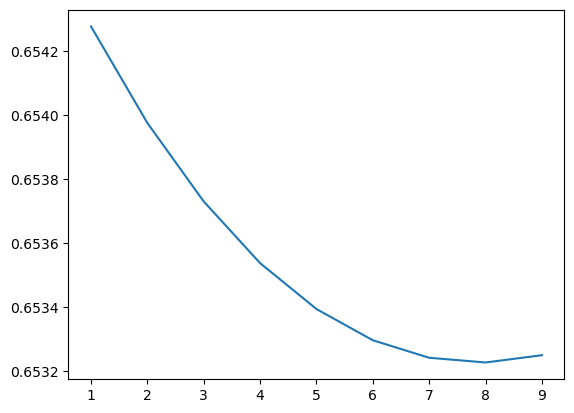

In [85]:
plt.plot(alphas,mse)

In [86]:
index=np.where(mse == mse.min())[0][0]
index

7

In [87]:
alphas

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [88]:
model = Pipeline([
    ('std_scaler',StandardScaler()),
    ('ridge_reg',Ridge(alpha=alphas[index],fit_intercept=False))
])
model.fit(x_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('ridge_reg', Ridge(alpha=8, fit_intercept=False))])

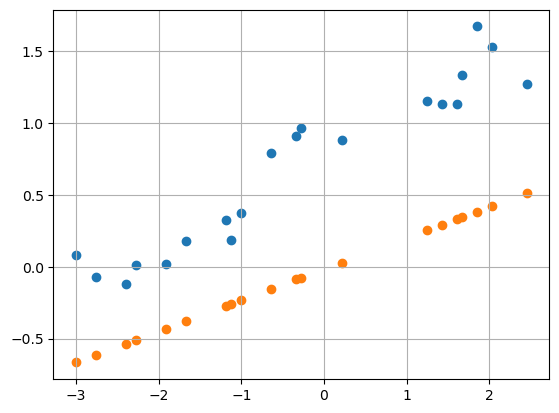

In [89]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,model.predict(x_test))
plt.grid()

In [90]:
mse.min()

0.6532275667247807

In [91]:
mean_squared_error(y_test,model.predict(x_test))

0.6532275667247807

Comparando mse com alpha do ridge e com o grau do polinomio

In [92]:
n = 30

alphas = np.arange(n)
poly_degree = np.arange(n)
mse = np.empty((len(alphas),len(poly_degree)))

In [93]:
for alpha in alphas:
    for degree in poly_degree:
        model = Pipeline([
            ('std_scaler',StandardScaler()),
            ('poly',PolynomialFeatures(degree)),
            ('ridge_reg',Ridge(alpha,fit_intercept=False))
        ])
        model.fit(x_train,y_train)
        mse[alpha,degree] = mean_squared_error(y_test,model.predict(x_test))

/home/mickael/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.78824e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/mickael/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.4923e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/mickael/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.17555e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/mickael/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.40948e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/mickael/anaconda3/lib/python3.1

In [94]:
mse

array([[0.32430899, 0.05158033, 0.0544866 , 0.0262194 , 0.02653957,
        0.02137519, 0.01534348, 0.01946902, 0.00911664, 0.00948397,
        0.01614043, 0.01863319, 0.02358235, 0.02050169, 0.02053286,
        0.01622536, 0.01363223, 0.01460966, 0.02612768, 0.07596134,
        0.08743731, 0.12614032, 0.06023528, 0.10870989, 0.20366566,
        0.72243246, 3.19182301, 4.65482995, 5.41372133, 1.66662195],
       [0.32396147, 0.05403163, 0.05460211, 0.02866311, 0.02941492,
        0.02055713, 0.01699001, 0.01685097, 0.01700849, 0.01978178,
        0.01729636, 0.02409203, 0.02015342, 0.01933695, 0.02129571,
        0.01685446, 0.02467922, 0.02153838, 0.03287743, 0.0370251 ,
        0.03383506, 0.04090884, 0.02108138, 0.02151285, 0.01519209,
        0.01499959, 0.02115151, 0.03334756, 0.15168093, 0.32463   ],
       [0.32377186, 0.05658626, 0.0553913 , 0.03226345, 0.03329644,
        0.02115503, 0.01893253, 0.01983945, 0.0193725 , 0.01939238,
        0.01859547, 0.0269766 , 0.02336775, 0.

In [95]:
alpha, degree = np.where(mse == mse.min())

In [96]:
print(f'valor de alpha: {alpha[0]}\nvalor do grau: {degree[0]}')

valor de alpha: 0
valor do grau: 8


In [97]:
model = Pipeline([
    ('std_scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree[0])),
    ('ridge_reg',Ridge(alpha=alpha[0],fit_intercept=False))
])
model.fit(x_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=8)),
                ('ridge_reg', Ridge(alpha=0, fit_intercept=False))])

In [98]:
x_smooth_test = np.linspace(x_test.min(),x_test.max(),1000).reshape(-1,1)
x_smooth_test

array([[-3.00000000e+00],
       [-2.99453999e+00],
       [-2.98907999e+00],
       [-2.98361998e+00],
       [-2.97815998e+00],
       [-2.97269997e+00],
       [-2.96723997e+00],
       [-2.96177996e+00],
       [-2.95631996e+00],
       [-2.95085995e+00],
       [-2.94539995e+00],
       [-2.93993994e+00],
       [-2.93447993e+00],
       [-2.92901993e+00],
       [-2.92355992e+00],
       [-2.91809992e+00],
       [-2.91263991e+00],
       [-2.90717991e+00],
       [-2.90171990e+00],
       [-2.89625990e+00],
       [-2.89079989e+00],
       [-2.88533989e+00],
       [-2.87987988e+00],
       [-2.87441987e+00],
       [-2.86895987e+00],
       [-2.86349986e+00],
       [-2.85803986e+00],
       [-2.85257985e+00],
       [-2.84711985e+00],
       [-2.84165984e+00],
       [-2.83619984e+00],
       [-2.83073983e+00],
       [-2.82527983e+00],
       [-2.81981982e+00],
       [-2.81435981e+00],
       [-2.80889981e+00],
       [-2.80343980e+00],
       [-2.79797980e+00],
       [-2.7

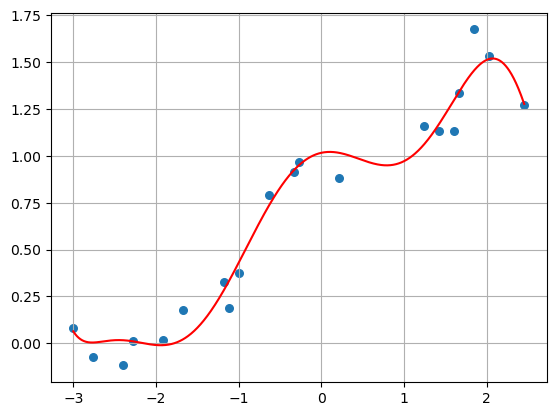

In [99]:
plt.scatter(x_test,y_test,s=30)
plt.plot(x_smooth_test,model.predict(x_smooth_test),color='red')
plt.grid()

In [100]:
mean_squared_error(y_test,model.predict(x_test))

0.009116637925575561

In [101]:
model = Pipeline([
    ('std_scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree[0])),
    ('ridge_reg',LinearRegression(fit_intercept=False))
])
model.fit(x_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=8)),
                ('ridge_reg', LinearRegression(fit_intercept=False))])

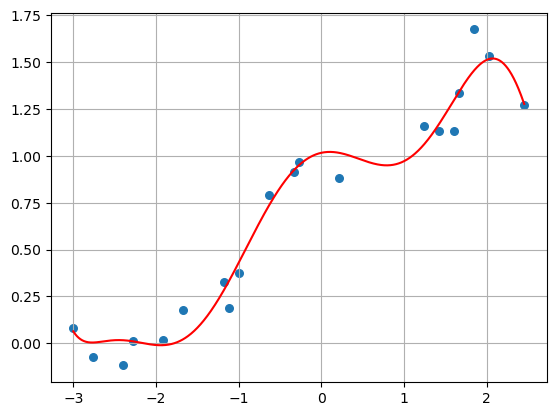

In [102]:
plt.scatter(x_test,y_test,s=30)
plt.plot(x_smooth_test,model.predict(x_smooth_test),color='red')
plt.grid()

In [103]:
mean_squared_error(y_test,model.predict(x_test))

0.009116637925554618

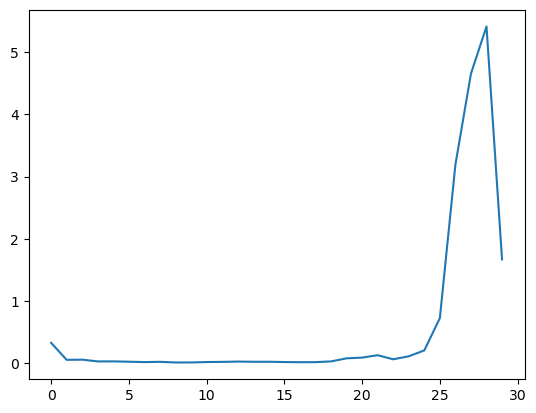

In [104]:
plt.plot(poly_degree,mse[0,:])